# Conversion Attribution

**We will automate common marketing analysis and determine why certain channels have lower than usual conversion rates**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

marketing = pd.read_csv('./datasets/marketing.csv')

**To avoid repetition, we create a function that calculates conversion rate**

In [2]:
def conversion_rate(dataframe, column_names):
    #Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()
    
    #Total number of users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    
    #Conversion Rate
    conversion_rate = column_conv/column_total
    
    #Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    
    return conversion_rate

**Let's test the function calculating some conversion rate**

date_served  age_group  
1/1/18       0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
Name: user_id, dtype: float64
age_group    0-18 years  19-24 years  24-30 years  30-36 years  36-45 years  \
date_served                                                                   
1/1/18         0.155172     0.196721     0.105263     0.040816     0.042553   
1/10/18        0.100000     0.216667     0.129630     0.068182     0.088889   
1/11/18        0.085106     0.187500     0.173913     0.000000     0.000000   
1/12/18        0.071429     0.226415     0.076923     0.075000     0.000000   
1/13/18        0.105263     0.130435     0.113636     0.052632     0.100000   

age_group    45-55 years  55+ years  
date_served                          
1/1/18          0.022222   0.086957  
1/10/18         0.090909   0.100000  
1/11/18         0.055556   0.029412  
1/12/18         

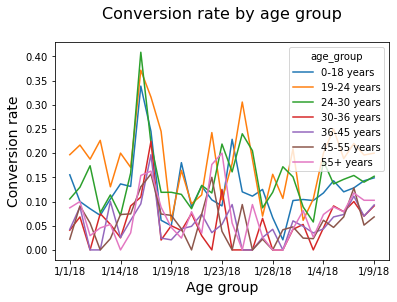

In [3]:
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])

print(age_group_conv.head())

age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

print(age_group_df.head())

age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

**Now a function for plotting**

In [4]:
def plotting_conv(dataframe):
    for column in dataframe:
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.show()
        plt.clf()

**Time to use both functions**

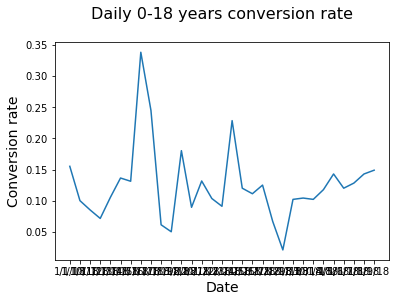

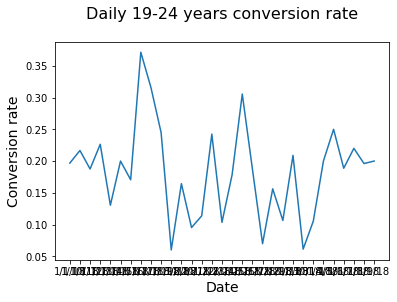

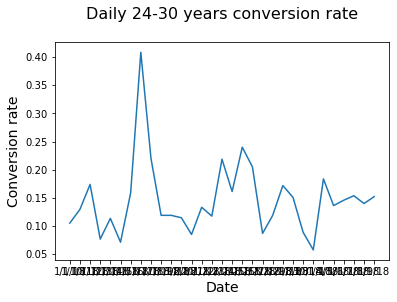

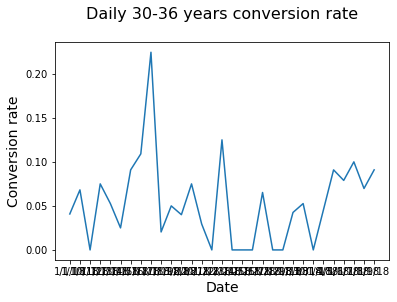

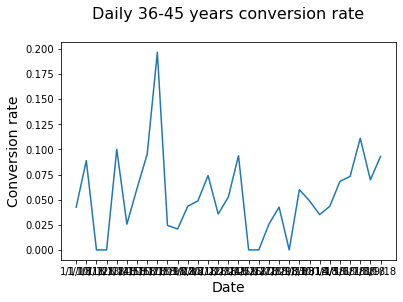

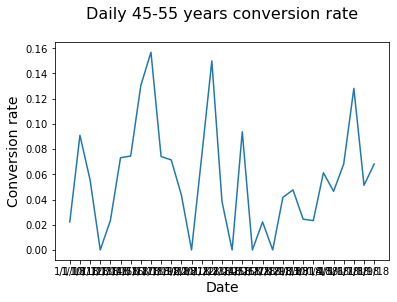

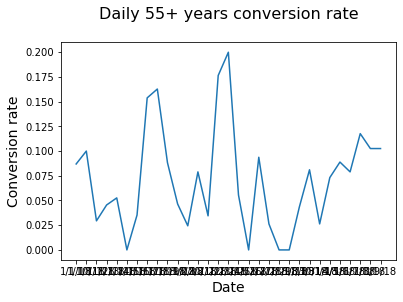

<Figure size 432x288 with 0 Axes>

In [5]:
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])

age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

plotting_conv(age_group_df)

## Identifying inconsistencines

In [6]:
daily_conv_channel = conversion_rate(marketing, ['date_served', 'marketing_channel'])

print(daily_conv_channel.head())

date_served  marketing_channel
1/1/18       Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
Name: user_id, dtype: float64


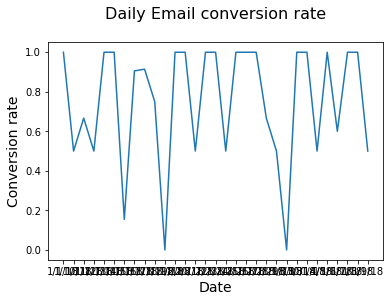

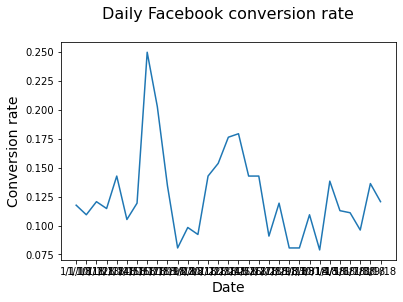

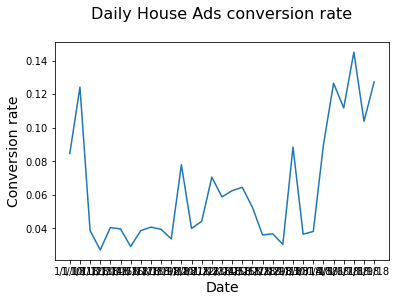

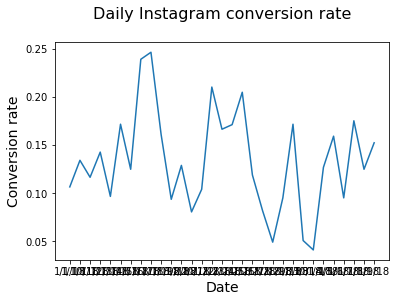

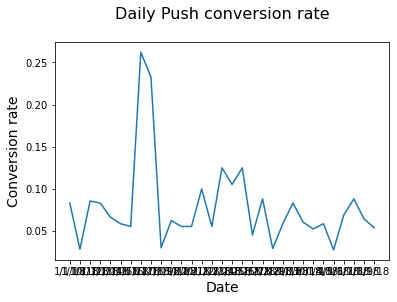

<Figure size 432x288 with 0 Axes>

In [7]:
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

plotting_conv(daily_conv_channel)

In [8]:
marketing['date_served'] = pd.to_datetime(marketing['date_served'])
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

In [9]:
print(marketing.head())

      user_id date_served marketing_channel          variant converted  \
0  a100000029  2018-01-01         House Ads  personalization      True   
1  a100000030  2018-01-01         House Ads  personalization      True   
2  a100000031  2018-01-01         House Ads  personalization      True   
3  a100000032  2018-01-01         House Ads  personalization      True   
4  a100000033  2018-01-01         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years          1/1/18   
1            English            English  19-24 years          1/1/18   
2            English            English  24-30 years          1/1/18   
3            English            English  30-36 years          1/1/18   
4            English            English  36-45 years          1/1/18   

  date_canceled subscribing_channel is_retained  DoW_served  
0           NaN           House Ads        True         0.0 

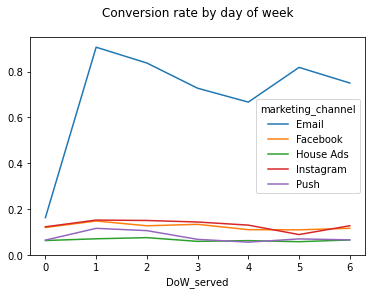

In [10]:
DoW_conversion = conversion_rate(marketing, ['DoW_served', 'marketing_channel'])
DoW_df = pd.DataFrame(DoW_conversion.unstack(level = 1))

DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

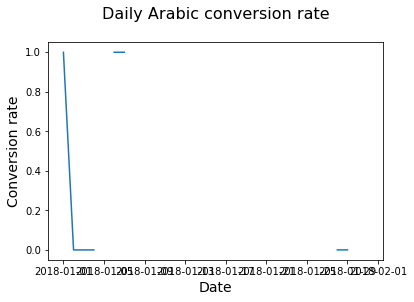

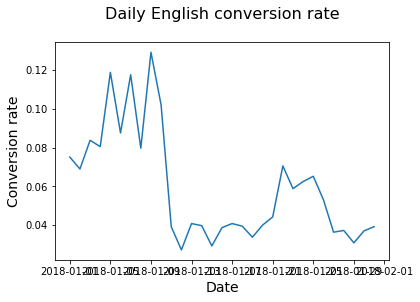

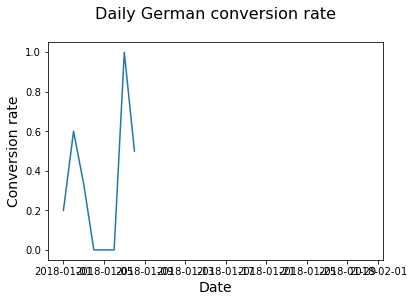

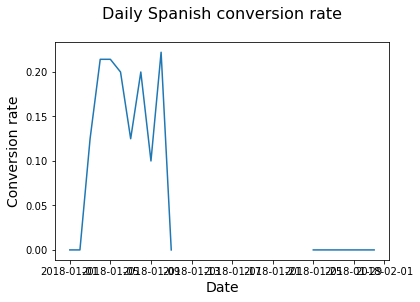

<Figure size 432x288 with 0 Axes>

In [11]:
house_ads = marketing[marketing['marketing_channel'] == 'House Ads']

conv_lang_channel = conversion_rate(house_ads, ['date_served', 'language_displayed'])

conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level = 1))

plotting_conv(conv_lang_df)

In [23]:
%%capture
house_ads['is_correct_lang'] = np.where(house_ads['language_displayed'] == house_ads['language_preferred'], 'Yes', 'No')

language_check = house_ads.groupby(['date_served', 'is_correct_lang'])['user_id'].count()

language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

In [25]:
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


In [33]:
language_check_df['pct'] = language_check_df['Yes'] / language_check_df.sum(axis = 1)
print(language_check_df.head())

is_correct_lang   No    Yes       pct
date_served                          
2018-01-01       2.0  189.0  0.958581
2018-01-02       3.0  247.0  0.957110
2018-01-03       0.0  220.0  0.968731
2018-01-04       0.0  168.0  0.968717
2018-01-05       0.0  160.0  0.968713


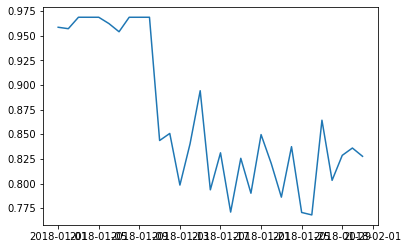

In [34]:
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.show()

## Resolving Inconsistencies